# 102_이미지 데이터 셋을 이용한 CNN Modeling(Colab File Upload)
## Dogs and Cats Image_Data
* Train_Data : 2000(1000_Dogs, 1000_Cats)
* Valid_Data : 1000(500_Dogs, 500_Cats)
* Test_Data : 1000(500_Dogs, 500_Cats)

## Import Tensorflow & Keras

* TensorFlow Version 지정

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

tf.__version__

'1.15.0'

* GPU 설정 확인

In [0]:
print('GPU Information -', tf.test.gpu_device_name(), '\n')

!nvidia-smi

GPU Information - /device:GPU:0 

Fri Feb 21 03:04:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    23W /  75W |    115MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                          

* Keras Version 확인

In [0]:
import keras

keras.__version__

Using TensorFlow backend.


'2.2.5'

# I. Colab File Upload

> ## 1) 'dogs_and_cats_small.zip' 파일을 Colab에 업로드 후 진행
* 약 8분

In [0]:
!ls -l

total 88504
-rw-r--r-- 1 root root 90618980 Feb 21 03:31 dogs_and_cats_small.zip
drwxr-xr-x 1 root root     4096 Feb  5 18:37 sample_data


> ## 2) unzip

In [0]:
!unzip dogs_and_cats_small.zip

In [0]:
!ls -l

total 88516
-rw-r--r-- 1 root root 90618980 Feb 21 03:31 dogs_and_cats_small.zip
drwxr-xr-x 1 root root     4096 Feb  5 18:37 sample_data
drwxr-xr-x 4 root root     4096 Feb 21 03:32 test
drwxr-xr-x 4 root root     4096 Feb 21 03:32 train
drwxr-xr-x 4 root root     4096 Feb 21 03:32 validation


# II. Data Preprocessing

> ## 1) Image_File Directory Setting

* train_dir
* validation_dir
* test_dir

In [0]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

> ## 2) ImageDataGenerator( ) & flow_from_directory( )

* Normalization
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


> ## 3) Test train_generator

In [0]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


# III. CNN Keras Modeling

> ## 1) Model Define

* Feature Extraction & Classification

In [0]:
from keras import layers
from keras import models

model = models.Sequential(name = 'SimpleCNN')
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model.summary()

Model: "SimpleCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       14

> ## 2) Model Compile

* 모델 학습방법 설정

In [0]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행
 * 약 8분

In [0]:
Hist_dandc = model.fit_generator(train_generator,
                                 steps_per_epoch = 100,
                                 epochs = 60,
                                 validation_data = valid_generator,
                                 validation_steps = 50)




Epoch 1/60





100/100 [==============================] - 21s 212ms/step - loss: 0.7463 - acc: 0.5180 - val_loss: 0.6858 - val_acc: 0.6160
Epoch 2/60
100/100 [==============================] - 8s 82ms/step - loss: 0.7161 - acc: 0.5875 - val_loss: 0.6543 - val_acc: 0.5970
Epoch 3/60
100/100 [==============================] - 8s 81ms/step - loss: 0.6404 - acc: 0.6595 - val_loss: 0.8070 - val_acc: 0.5560
Epoch 4/60
100/100 [==============================] - 8s 81ms/step - loss: 0.5988 - acc: 0.6925 - val_loss: 0.6011 - val_acc: 0.6550
Epoch 5/60
100/100 [==============================] - 8s 83ms/step - loss: 0.5450 - acc: 0.7280 - val_loss: 0.5714 - val_acc: 0.7050
Epoch 6/60
100/100 [==============================] - 8s 83ms/step - loss: 0.4922 - acc: 0.7540 - val_loss: 0.5811 - val_acc: 0.7030
Epoch 7/60
100/100 [==============================] - 8s 82ms/step - loss: 0.4324 - acc: 0.8025 - val_loss: 0.6026 - val_acc: 0.6900
Epoch 8/60
100/100 [==============================] - 8s 83

> ## 4) 학습 결과 시각화

* Loss Visualization

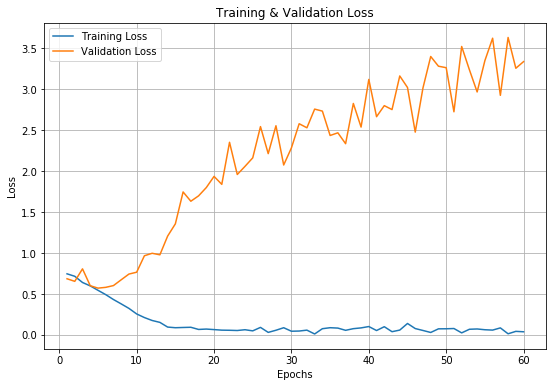

In [0]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

* Accuracy Visualization

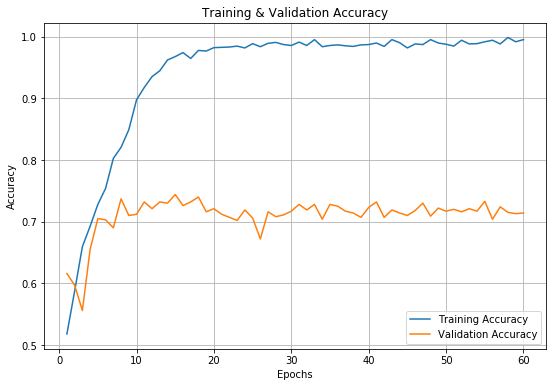

In [0]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['acc'])
plt.plot(epochs, Hist_dandc.history['val_acc'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* test_generator

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [0]:
loss, accuracy = model.evaluate_generator(test_generator,
                                          steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 3.15840
Accuracy = 0.72400


# IV. Model Save & Load to Google Drive

> ## 1) Google Drive Mount

In [0]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


> ## 2) Model Save

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [0]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 27040
-rw------- 1 root root    22464 Feb 20 01:59 001_Model_iris.h5
-rw------- 1 root root 27665728 Feb 21 03:44 002_dogs_and_cats_small.h5


> ## 3) Model Load

In [0]:
from keras.models import load_model

model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [0]:
loss, accuracy = model_google.evaluate_generator(test_generator,
                                                 steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 3.15840
Accuracy = 0.72400


# 
# 
# 
# 102_The End
# 
# 
# 

In [0]:
# Keras 세션 초기화

keras.backend.clear_session()

# 103_이미지 증강(Image Augmentation)을 사용하여 CNN 학습
* Overfitting 대응책

> ## [Optional] Image Augmentation Test

* rotation_range = 40 : 0도에서 40도 사이에서 임의의 각도록 회전
* width_shift_range = 0.2 : 20% 픽셀 내외로 좌우 이동
* height_shift_range = 0.2 : 20% 픽셀 내외로 상하 이동
* shear_range = 0.2 : 0.2 라디안 내외로 시계 반대방향으로 변형
* zoom_range = 0.2 : 80%에서 120% 범위에서 확대/축소
* horizontal_flip = True : 수평방향 뒤집기
* vertical_flip = True : 수직방향 뒤집기
* fill_mode = 'nearest' : 주변 픽셀로 이미지 채우기

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip = True,
                             fill_mode = 'nearest')

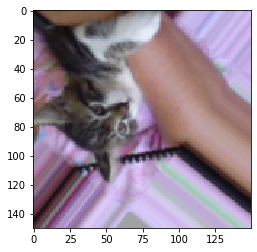

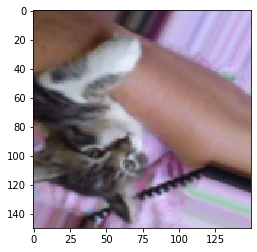

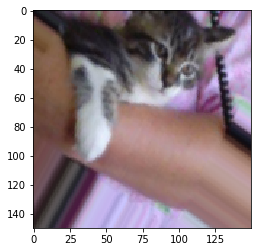

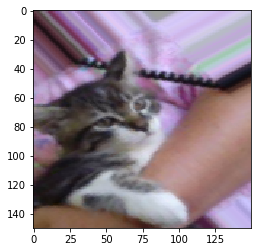

In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os

train_cats_dir = train_dir = os.path.join('train', 'cats')
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 테스트 이미지 선택
img_path = fnames[77]

# 이미지 읽고 크기 변경
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 배열 변환
x = image.img_to_array(img)

# (1, 150, 150, 3) 변환
x = x.reshape((1,) + x.shape)

# 랜덤하게 변환된 이미지 배치 생성
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

# I. Data Preprocessing

> ## 1) Image_File Directory Setting

* train_dir
* validation_dir
* test_dir

In [0]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

> ## 2) ImageDataGenerator( ) & flow_from_directory( )

* Normalization & Augmentaion
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# With Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest')

# Without Augmentation 
valid_datagen = ImageDataGenerator(rescale = 1./255)



# With Augmentation
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

# Without Augmentation
valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# II. CNN Keras Modeling

> ## 1) Model Define

* Feature Extraction & Classification
 * Dropout Layer

In [0]:
from keras import layers
from keras import models

model = models.Sequential(name = 'imageAugment')
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model.summary()

Model: "imageAugment"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

> ## 2) Model Compile

* 모델 학습방법 설정
 * optimizer : rmsprop -> adam

In [0]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행
 * epochs : 60 -> 100
 * 약 30분

In [0]:
Hist_dandc = model.fit_generator(train_generator,
                                 steps_per_epoch = 100,
                                 epochs = 100,
                                 validation_data = valid_generator,
                                 validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 18s 184ms/step - loss: 0.7019 - acc: 0.4935 - val_loss: 0.6926 - val_acc: 0.5570
Epoch 2/100
100/100 [==============================] - 16s 165ms/step - loss: 0.6931 - acc: 0.4890 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6958 - acc: 0.4900 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6933 - acc: 0.5025 - val_loss: 0.6929 - val_acc: 0.5020
Epoch 5/100
100/100 [==============================] - 16s 164ms/step - loss: 0.6933 - acc: 0.4935 - val_loss: 0.6930 - val_acc: 0.5040
Epoch 6/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6934 - acc: 0.4970 - val_loss: 0.6929 - val_acc: 0.4990
Epoch 7/100
100/100 [==============================] - 17s 170ms/step - loss: 0.6928 - acc: 0.5150 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 8/100
100/100 [===========================

> ## 4) 학습 결과 시각화

* Loss Visualization

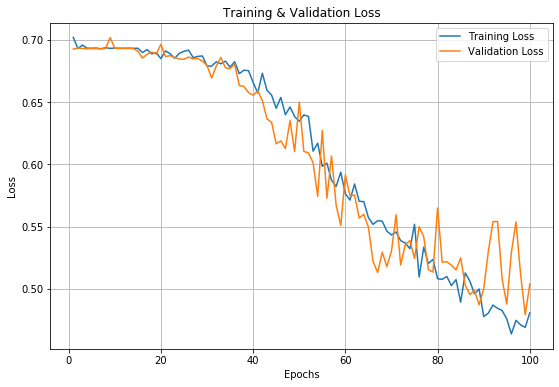

In [0]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

* Accuracy Visualization

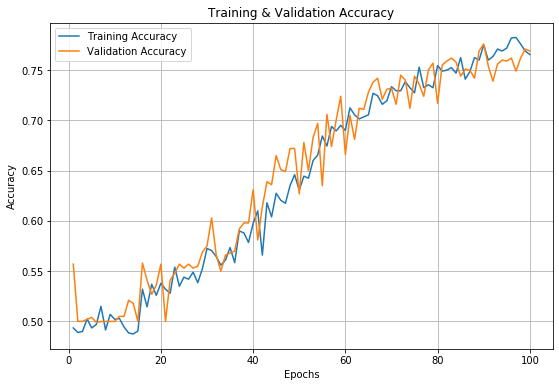

In [0]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['acc'])
plt.plot(epochs, Hist_dandc.history['val_acc'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* test_generator

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [0]:
loss, accuracy = model.evaluate_generator(test_generator,
                                          steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.53195
Accuracy = 0.75100


# III. Model Save & Load to Google Drive

> ## 1) Google Drive Mount

In [0]:
# from google.colab import drive

# drive.mount('/content/drive')

> ## 2) Model Save

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/models/003_dogs_and_cats_augmentation.h5')

In [0]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 67558
-rw------- 1 root root    22464 Feb 20 01:59 001_Model_iris.h5
-rw------- 1 root root 27665728 Feb 21 03:44 002_dogs_and_cats_small.h5
-rw------- 1 root root 41490144 Feb 21 04:17 003_dogs_and_cats_augmentation.h5


> ## 3) Model Load

In [0]:
from keras.models import load_model

model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/003_dogs_and_cats_augmentation.h5')

In [0]:
loss, accuracy = model_google.evaluate_generator(test_generator,
                                                 steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.53195
Accuracy = 0.75100


# 
# 
# 
# 103_The End
# 
# 
# 

In [0]:
# Keras 세션 초기화

keras.backend.clear_session()

# 104_사전 학습된 CNN(VGG-16)을 이용한 Feature Extraction
## VGG-16 Model
* University of Oxford - Visual Geometry Group
* 2014 ILSVRC 2nd Model
* ImageNet Large Scale Visual Recognition Challenge (ILSVRC)


# I. Image_File Directory Setting

* train_dir
* validation_dir
* test_dir

In [0]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

# II. Import VGG-16 Model

> ## 1) conv_base

In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))

58892288/58889256 [==============================] - 2s 0us/step


> ## 2) Model Information

In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# III. Feature Extraction

> ## 1) 특징추출 함수 정의 : extract_feature( )
* conv_base.predict( )

In [0]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(rescale = 1./255)

batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels = np.zeros(shape = (sample_count))
    
    generator = datagen.flow_from_directory(directory,
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

> ## 2) 특징추출 함수 적용
* train_dir
* valid_dir
* test_dir

In [0]:
train_features, train_labels = extract_features(train_dir, 2000)
valid_features, valid_labels = extract_features(valid_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features.shape, valid_features.shape, test_features.shape

((2000, 4, 4, 512), (1000, 4, 4, 512), (1000, 4, 4, 512))

> ## 3) Reshape Features
* For 'Classification' Network

In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
valid_features = np.reshape(valid_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

train_features.shape, valid_features.shape, test_features.shape

((2000, 8192), (1000, 8192), (1000, 8192))

# IV. Keras CNN Modeling with VGG-16 Featured Data

> ## 1) Model Define

* 'Classification' Network Only
* Dropout Layer

In [0]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [0]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행

In [0]:
Hist_dandc = model.fit(train_features, train_labels,
                       epochs = 100,
                       batch_size = 20,
                       validation_data = (valid_features, valid_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/100
2000/2000 [==============================] - 1s 523us/step - loss: 0.4185 - acc: 0.8185 - val_loss: 0.2557 - val_acc: 0.9080
Epoch 2/100
2000/2000 [==============================] - 1s 384us/step - loss: 0.2403 - acc: 0.8980 - val_loss: 0.2359 - val_acc: 0.9020
Epoch 3/100
2000/2000 [==============================] - 1s 333us/step - loss: 0.1876 - acc: 0.9245 - val_loss: 0.3455 - val_acc: 0.8670
Epoch 4/100
2000/2000 [==============================] - 1s 349us/step - loss: 0.1629 - acc: 0.9325 - val_loss: 0.2365 - val_acc: 0.9050
Epoch 5/100
2000/2000 [==============================] - 1s 343us/step - loss: 0.1139 - acc: 0.9515 - val_loss: 0.2469 - val_acc: 0.9020
Epoch 6/100
2000/2000 [==============================] - 1s 360us/step - loss: 0.0865 - acc: 0.9680 - val_loss: 0.2425 - val_acc: 0.8980
Epoch 7/100
2000/2000 [==============================] - 1s 367us/step - loss: 0.0659 - acc: 0.9790 - val_loss: 0.2836 - val_acc: 

> ## 4) 학습 결과 시각화

* Loss Visualization

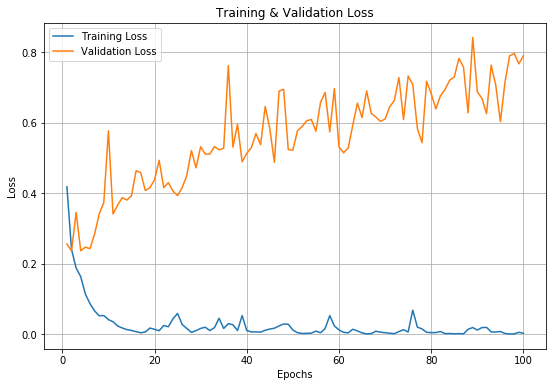

In [0]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

* Accuracy Visualization

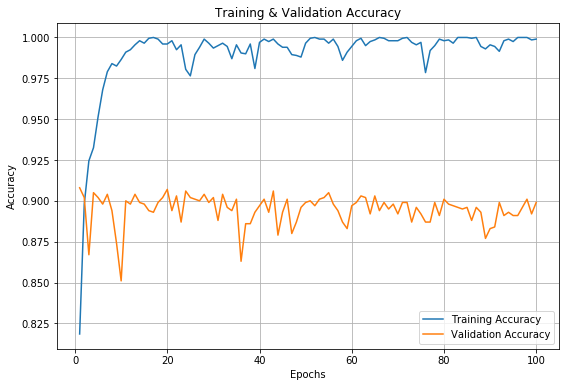

In [0]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['acc'])
plt.plot(epochs, Hist_dandc.history['val_acc'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [0]:
loss, accuracy = model.evaluate(test_features, test_labels)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

1000/1000 [==============================] - 0s 87us/step
Loss = 0.89571
Accuracy = 0.88200


# V. Model Save & Load to Google Drive

> ## 1) Google Drive Mount

In [0]:
# from google.colab import drive

# drive.mount('/content/drive')

> ## 2) Model Save

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/models/004_dogs_and_cats_feature_extraction.h5')

In [0]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 92163
-rw------- 1 root root    22464 Feb 20 01:59 001_Model_iris.h5
-rw------- 1 root root 27665728 Feb 21 03:44 002_dogs_and_cats_small.h5
-rw------- 1 root root 41490144 Feb 21 04:17 003_dogs_and_cats_augmentation.h5
-rw------- 1 root root 25195536 Feb 21 04:32 004_dogs_and_cats_feature_extraction.h5


> ## 3) Model Load

In [0]:
from keras.models import load_model

model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/004_dogs_and_cats_feature_extraction.h5')

In [0]:
loss, accuracy = model_google.evaluate(test_features, test_labels)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

1000/1000 [==============================] - 0s 177us/step
Loss = 0.89571
Accuracy = 0.88200


# 
# 
# 
# 104_The End
# 
# 
# 

In [0]:
# Keras 세션 초기화

keras.backend.clear_session()

# 105_사전 학습된 CNN(VGG-16)을 이용한 Fine Tunig
## VGG-16 Model
* University of Oxford - Visual Geometry Group
* 2014 ILSVRC 2nd Model
* ImageNet Large Scale Visual Recognition Challenge (ILSVRC)


# I. Image_File Directory Setting

* train_dir
* validation_dir
* test_dir

In [0]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

# II. Data Preprocessing

> ## 1)  ImageDataGenerator( ) & flow_from_directory( )

* Normalization
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# III. Import VGG-16 Model & Some Layers Freezing

> ## 1) conv_base

In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))

> ## 2) Model Information

In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

> ## 3) 'block5_conv1' Freezing

* Before 'weight' Freezing

In [0]:
print('conv_base 동결 전 훈련 가능 가중치의 종류:', len(conv_base.trainable_weights))

conv_base 동결 전 훈련 가능 가중치의 종류: 26


* 'weight' Freezing

In [0]:
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

* After 'weight' Freezing

In [0]:
print('conv_base 동결 후 훈련 가능 가중치의 종류:', len(conv_base.trainable_weights))

conv_base 동결 후 훈련 가능 가중치의 종류: 6


In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# IV. Keras CNN Modeling with VGG-16 Freezed Layers

> ## 1) Model Define

* 'conv_base' & 'Classification' Network
* Dropout Layer

In [0]:
from keras import models, layers

model = models.Sequential(name = 'CNN_VGG16')
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model.summary()

Model: "CNN_VGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정
 * 이미 학습된 Weight 값을 Tuning
 * 매우 작은 Learnig Rate 지정
 * optimizers.Adam(lr = 0.000005)

In [0]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(lr = 0.000005),
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행
 * 약 25분

In [0]:
Hist_dandc = model.fit_generator(train_generator,
                                 steps_per_epoch = 100,
                                 epochs = 100,
                                 validation_data = valid_generator,
                                 validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 16s 156ms/step - loss: 0.6779 - acc: 0.6070 - val_loss: 0.4785 - val_acc: 0.8440
Epoch 2/100
100/100 [==============================] - 14s 142ms/step - loss: 0.4301 - acc: 0.7900 - val_loss: 0.3215 - val_acc: 0.8780
Epoch 3/100
100/100 [==============================] - 14s 142ms/step - loss: 0.3011 - acc: 0.8785 - val_loss: 0.2594 - val_acc: 0.8910
Epoch 4/100
100/100 [==============================] - 14s 143ms/step - loss: 0.2328 - acc: 0.9065 - val_loss: 0.2342 - val_acc: 0.9010
Epoch 5/100
100/100 [==============================] - 14s 143ms/step - loss: 0.1930 - acc: 0.9310 - val_loss: 0.2198 - val_acc: 0.9110
Epoch 6/100
100/100 [==============================] - 14s 144ms/step - loss: 0.1632 - acc: 0.9385 - val_loss: 0.2080 - val_acc: 0.9150
Epoch 7/100
100/100 [==============================] - 14s 144ms/step - loss: 0.1370 - acc: 0.9500 - val_loss: 0.1938 - val_acc: 0.9210
Epoch 8/100
100/100 [===========================

> ## 4) 학습 결과 시각화

* Loss Visualization

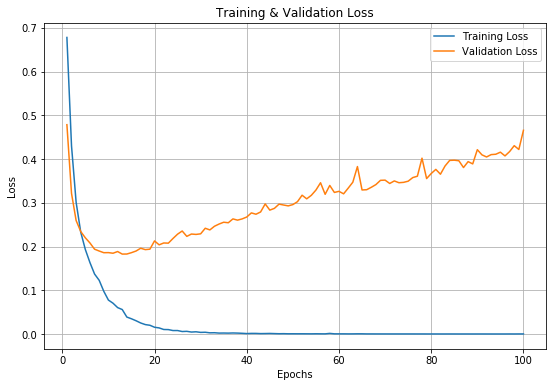

In [0]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

* Accuracy Visualization

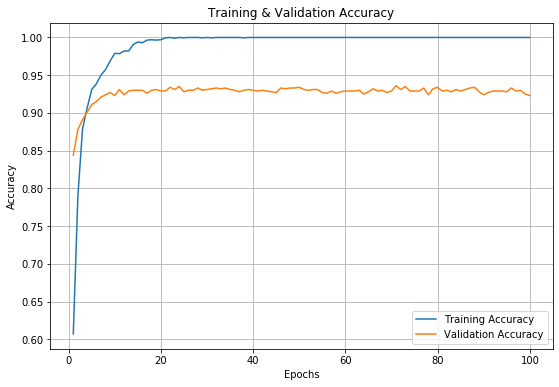

In [0]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['acc'])
plt.plot(epochs, Hist_dandc.history['val_acc'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* test_generator

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


* Loss & Accuracy

In [0]:
loss, accuracy = model.evaluate_generator(test_generator,
                                          steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.42771
Accuracy = 0.92300


# V. Model Save & Load to Google Drive

> ## 1) Google Drive Mount

In [0]:
# from google.colab import drive

# drive.mount('/content/drive')

> ## 2) Model Save

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/models/005_dogs_and_cats_fine_tuning.h5')

In [0]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 229598
-rw------- 1 root root     22464 Feb 20 01:59 001_Model_iris.h5
-rw------- 1 root root  27665728 Feb 21 03:44 002_dogs_and_cats_small.h5
-rw------- 1 root root  41490144 Feb 21 04:17 003_dogs_and_cats_augmentation.h5
-rw------- 1 root root  25195536 Feb 21 04:32 004_dogs_and_cats_feature_extraction.h5
-rw------- 1 root root 140732592 Feb 21 05:12 005_dogs_and_cats_fine_tuning.h5


> ## 3) Model Load

In [0]:
from keras.models import load_model

model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/005_dogs_and_cats_fine_tuning.h5')

In [0]:
loss, accuracy = model_google.evaluate_generator(test_generator,
                                                 steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.42771
Accuracy = 0.92300


# 
# 
# 
# 105_The End
# 
# 
# 